https://www.alpha-i.co/blog/MNIST-for-ML-beginners-The-Bayesian-Way.html

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
#from edward.models import Categorical, Normal
#import edward as ed
import pandas as pd
import pickle
#ed.set_seed(314159)

In [30]:
singlerun = pd.read_csv('singlerun.csv')

In [31]:
singlerun.head()

,Unnamed: 0,iteration,mu1,algo
0,1,0.000,0.362858,isaem
1,2,0.001,0.113514,isaem
2,3,0.002,0.113237,isaem
3,4,0.003,0.113385,isaem
4,5,0.004,0.113378,isaem


In [32]:
emrun = singlerun[singlerun.algo=='EM'].mu1
iemrun = singlerun[singlerun.algo=='IEM'].mu1
saemrun = singlerun[singlerun.algo=='saem'].mu1
isaemrun = singlerun[singlerun.algo=='isaem'].mu1
isaem10run = singlerun[singlerun.algo=='isaem10'].mu1
isaem50run = singlerun[singlerun.algo=='isaem50'].mu1

In [33]:
len(isaem10run)

151

In [34]:
xaxisrun10 = singlerun[singlerun.algo=='isaem10'].iteration
xaxisrun50 = singlerun[singlerun.algo=='isaem50'].iteration
xaxisrun = singlerun[singlerun.algo=='isaem'].iteration
xaxisrunem = singlerun[singlerun.algo=='EM'].iteration

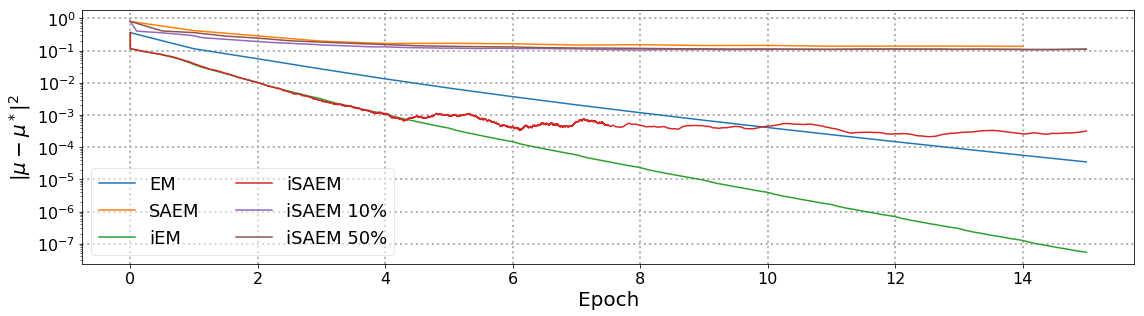

In [38]:
#5 RUNS
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 4.5))
axes.set_yscale('log')
plt.plot(xaxisrunem, emrun, label='EM', marker='')
plt.plot(xaxisrunem, saemrun, label='SAEM', marker='')
plt.plot(xaxisrun, iemrun, label='iEM', marker='')
plt.plot(xaxisrun, isaemrun, label='iSAEM', marker='')
plt.plot(xaxisrun10, isaem10run, label='iSAEM 10%', marker='')
plt.plot(xaxisrun50, isaem50run, label='iSAEM 50%', marker='')

leg = plt.legend(fontsize=18,fancybox=True, loc=3,ncol=2)
leg.get_frame().set_alpha(0.5)
plt.xlabel('Epoch', fontsize=20)
plt.ylabel(r'$|\mu-\mu^*|^2$', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(linestyle='dotted',linewidth=2)
fig.tight_layout()
plt.show()

In [39]:
fig.savefig("gmm_saembigger.png",bbox_inches = 'tight')